# NumPy Simple arrays

Create a simple two dimensional array (2x3): odd numbers counting backwards on the first row, and even numbers on the second.
(1 point)

In [ ]:
import numpy as np

array([[5, 3, 1],
       [4, 2, 0]])


# Creating arrays using functions

Experiment with `arange`, `linspace`, `ones`, `zeros`, `eye` and `diag`.
Create different kinds of arrays with random numbers. Try setting the seed before creating an array with random values.
(1 point)

In [ ]:
"""0 to 100 by 5"""
fives = np.arange(0,100,5)
fives
"""51 points from 0.0 to 1000.0"""
x = np.linspace(0, 1000, num=51, dtype=np.float64)
x
"""5 x 5 matrix of ones"""
np.ones([5, 5])
"""10 x 10 identity matrix"""
np.eye(10)
"""3 x 4 matrix of uniform random values"""
rand = np.random.random((3,4))
"""diagonal values from the matrix"""
np.diag(rand)

Look at the function np.empty. What does it do? When might this be useful?
(1 point)

Your answer:
`numpy.empty` returns an empty array without any initial values.
The programmer can specify the data type of values and whether elements
should be stored in row-major or column-major order.

The function is useful when you want to programmatically set each element of
an array.  In this case `empty` is faster than `zeros` for creating the array.

If you intend to access data in the array column-by-column,
then using `empty(..., order="F")`to specify column-major
ordering may make accessing the data *much* faster
for a large array.

# Simple visualizations

Plot 2 simple arrays:
1.   a cosine as a function of time (1 point)
2.   2D matrix using the gray colormap on the 2D matrix `cmap=plt.cm.gray` (1 point)

In [ ]:
import matlibplot.pyplot as plt
t = np.linspace(0,2*np.pi,100)
y = np.cos(t)
plt.plot(t, y, '-')
plt.xlabel("t")
plt.ylabel("cos(t)")
plt.title("Plot of cosine")
plt.tight_layout()
plt.show()

# Indexing and slicing

Try the different flavors of slicing, using start, end and step:

1.   starting from a linspace, try to obtain odd numbers counting backward (1 point)
2.   even numbers counting forwards (1 point)

In [ ]:
odds = np.arange(101,1,-2)   # easy way
odds = np.linspace(101, 1, num=51) # num=(end-start)/2 + 1
evens = np.linspace(2, 100, num=50)


# Array creation

Create the following arrays using only 3 statements for each (with correct data types):

Hint: Individual array elements can be accessed similarly to a list, e.g. `a[1]` or `a[1, 2]`.

Hint: Examine the docstring for diag.

1. (1 point)

```
[[1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 6, 1, 1]]
```

In [ ]:
a = np.ones((4,4))
a[2,3] = 2
a[3,1] = 6

2. (1 point)
```
[[0., 0., 0., 0., 0.],
 [2., 0., 0., 0., 0.],
 [0., 3., 0., 0., 0.],
 [0., 0., 4., 0., 0.],
 [0., 0., 0., 5., 0.],
 [0., 0., 0., 0., 6.]]
```

In [ ]:
v = np.arange(2,7)
a = np.diag(v, -1) # k<0 for diags below main diagonal

# Tiling for array creation

Skim through the documentation for `np.tile`, and use this function to construct the array:
(1 point)

```
[[4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1],
 [4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1]]
```

In [ ]:
a = np.arange(4, 0, -1).reshape(2,2)
tile_a = np.tile(a, (2,3))

# Prime number sieve

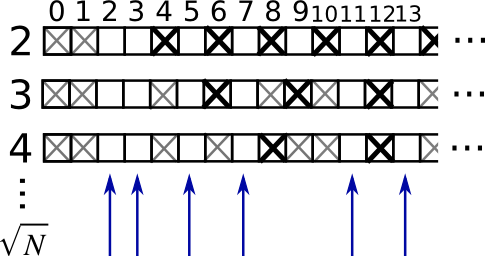

Compute prime numbers in 0–99, with a sieve

*   Construct a shape (100,) boolean array `is_prime`, filled with True in the beginning:

In [ ]:
import numpy as np
import math

def find_primes(max_value):
    """Find all prime numbers from 1 to max_value (int)"""
    # is_prime[k] is True if k is a prime number
    is_prime = np.ones(max_value+1, dtype="bool")
    # 0 and 1 are not prime numbers
    is_prime[0:2] = False
    for k in range(2, int(math.sqrt(len(is_prime))+1)):
        # if k itself is not a prime then nothing to do
        if is_prime[k]:
            is_prime[k+k::k] = False
    return np.nonzero(is_prime)[0]

max_value = 100
print(f"Prime numbers from 1 to {max_value} are")
primes = find_primes(max_value)
print(primes)


*   Cross out 0 and 1 which are not primes:

In [ ]:
is_prime[:2] = 0
is_prime

*   For each integer j starting from 2, cross out its higher multiples:

In [ ]:
N_max = int(np.sqrt(len(is_prime) - 1))
for j in range(2, N_max + 1):
    is_prime[2*j::j] = False
is_prime

*   Skim through `help(np.nonzero)`, and print the prime numbers
(1 point)

*   (4 point) Task: use the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes):
  1.   Skip `j` which are already known to not be primes
  2.   The first number to cross out is j^2